In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
import random
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
import src.cython.picture_worker_cy as picture_worker
from src import helper
from src import c_picture_worker

In [2]:
first_color_scheme = "PuBu"
second_color_scheme = "OrRd"
third_color_scheme = "RdPu"

In [3]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 200

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = (mu_x_1,mu_variance_x_1,mu_y_1,mu_variance_y_1)
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = (mu_x_2,mu_variance_x_2,mu_y_2,mu_variance_y_2)
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = (mu_x_3,mu_variance_x_3,mu_y_3,mu_variance_y_3)

In [4]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)

In [5]:
Z_new, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme=first_color_scheme)
Z_new_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,10,colorscheme=second_color_scheme)
Z_new_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,10,colorscheme=third_color_scheme)

In [6]:
wow = np.array([Z_new, Z_new_1, Z_new_2])

In [7]:
mixed, alpha_new = picture_worker.combine_multiple_images_hierarchic(blending_operator= hierarchic_blending_operator.porter_duff_source_over, images= wow, z_values=[Z, Z_1, Z_2])

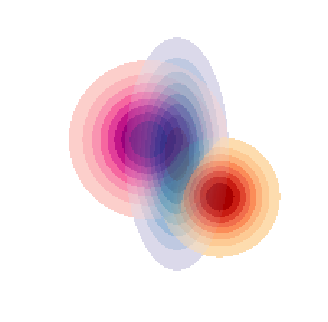

In [8]:
#displays an image
plt.imshow(mixed)
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()

In [9]:
Z_new.dtype

dtype('float64')

In [13]:
not_bad = c_picture_worker.callHierarchicMerge(wow, [Z, Z_1, Z_2])

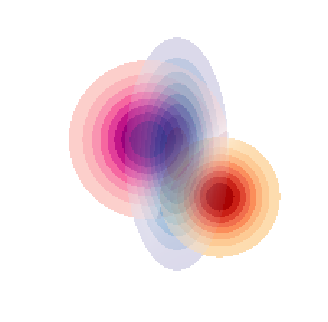

In [11]:
#displays an image
plt.imshow(not_bad[0])
plt.subplots_adjust(0, 0, 1, 1)
plt.axis("off")
plt.show()